## XgboostRegressor

### IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DESCRIPTIV ANALYSIS

In [2]:
# Read csv data
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
                 
# show 5 data
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [3]:
df.shape

(731, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       731 non-null    float64
 1   TM      731 non-null    float64
 2   Tm      731 non-null    float64
 3   SLP     731 non-null    float64
 4   H       731 non-null    float64
 5   VV      731 non-null    float64
 6   V       731 non-null    float64
 7   VM      731 non-null    float64
 8   PM 2.5  730 non-null    float64
dtypes: float64(9)
memory usage: 51.5 KB


In [5]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,730.000000
mean,25.556908,32.231874,19.273598,1008.196854,64.134063,1.891929,6.630369,15.696580,107.929150
std,7.286760,6.852548,7.454202,7.564601,15.460460,0.686446,3.967064,7.654019,82.576607
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,18.850000,27.550000,12.000000,1001.300000,55.000000,1.400000,3.500000,11.100000,43.583333
50%,27.700000,34.100000,21.000000,1008.500000,66.000000,1.900000,6.300000,14.800000,81.729167
75%,31.200000,36.900000,25.900000,1015.000000,75.000000,2.400000,9.100000,18.300000,153.934375
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [6]:
# check null values
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

<Axes: >

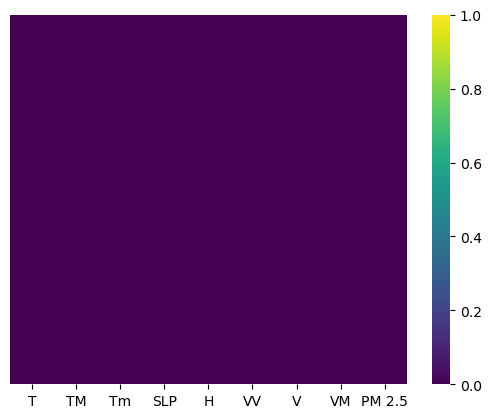

In [7]:
# heatmap null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [8]:
# drop null values
df = df.dropna()

In [9]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

print(X)

        T    TM    Tm     SLP     H   VV     V    VM
0     7.4   9.8   4.8  1017.6  93.0  0.5   4.3   9.4
1     7.8  12.7   4.4  1018.5  87.0  0.6   4.4  11.1
2     6.7  13.4   2.4  1019.4  82.0  0.6   4.8  11.1
3     8.6  15.5   3.3  1018.7  72.0  0.8   8.1  20.6
4    12.4  20.9   4.4  1017.3  61.0  1.3   8.7  22.2
..    ...   ...   ...     ...   ...  ...   ...   ...
726  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9
727  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2
728  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8
729  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5
730  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3

[730 rows x 8 columns]


In [10]:
print(y.isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Name: PM 2.5, Length: 730, dtype: bool


### EDA

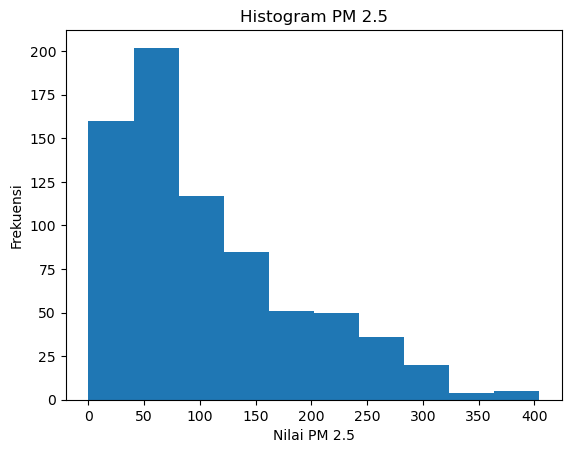

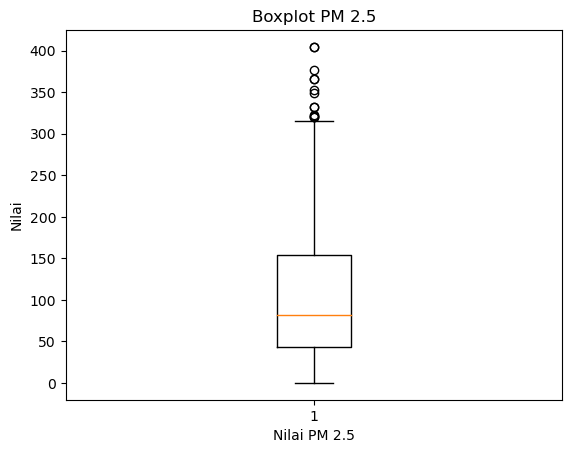

In [11]:
# Analisis univariate
# Plot histogram
plt.hist(df["PM 2.5"])
plt.title("Histogram PM 2.5")
plt.xlabel("Nilai PM 2.5")
plt.ylabel("Frekuensi")
plt.show()

# Plot boxplot
plt.boxplot(df["PM 2.5"])
plt.title("Boxplot PM 2.5")
plt.xlabel("Nilai PM 2.5")
plt.ylabel("Nilai")
plt.show()

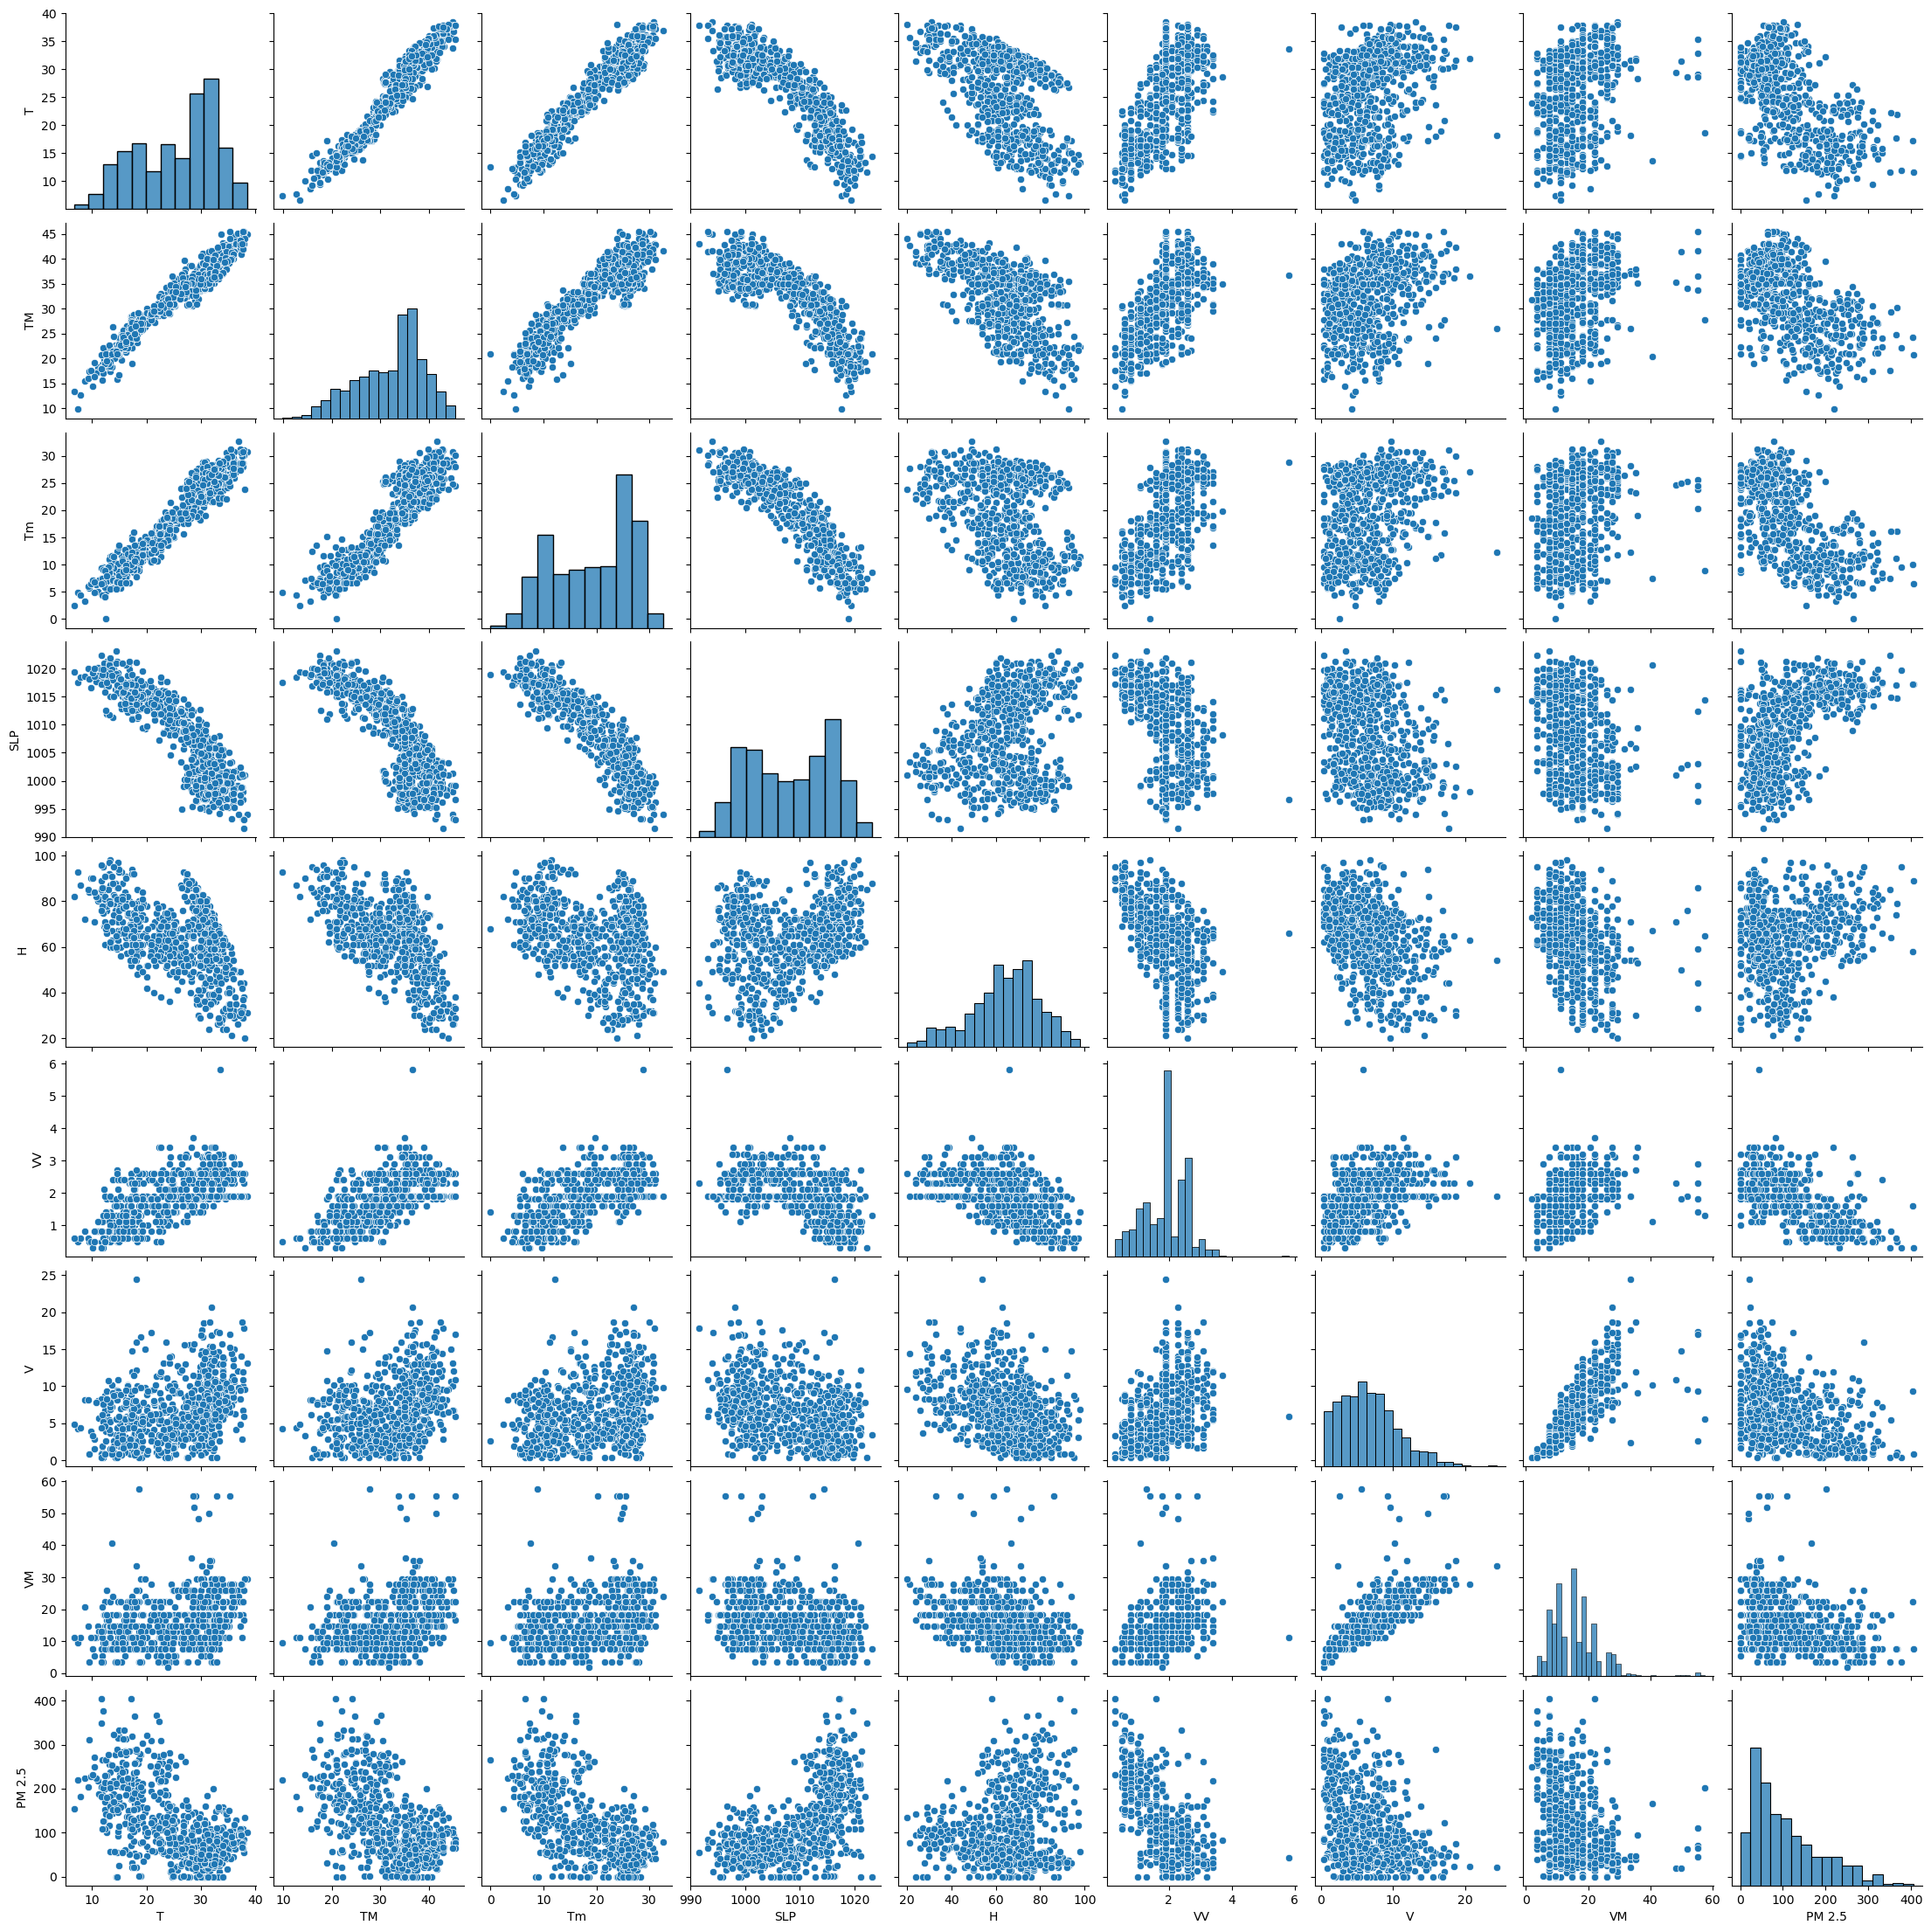

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

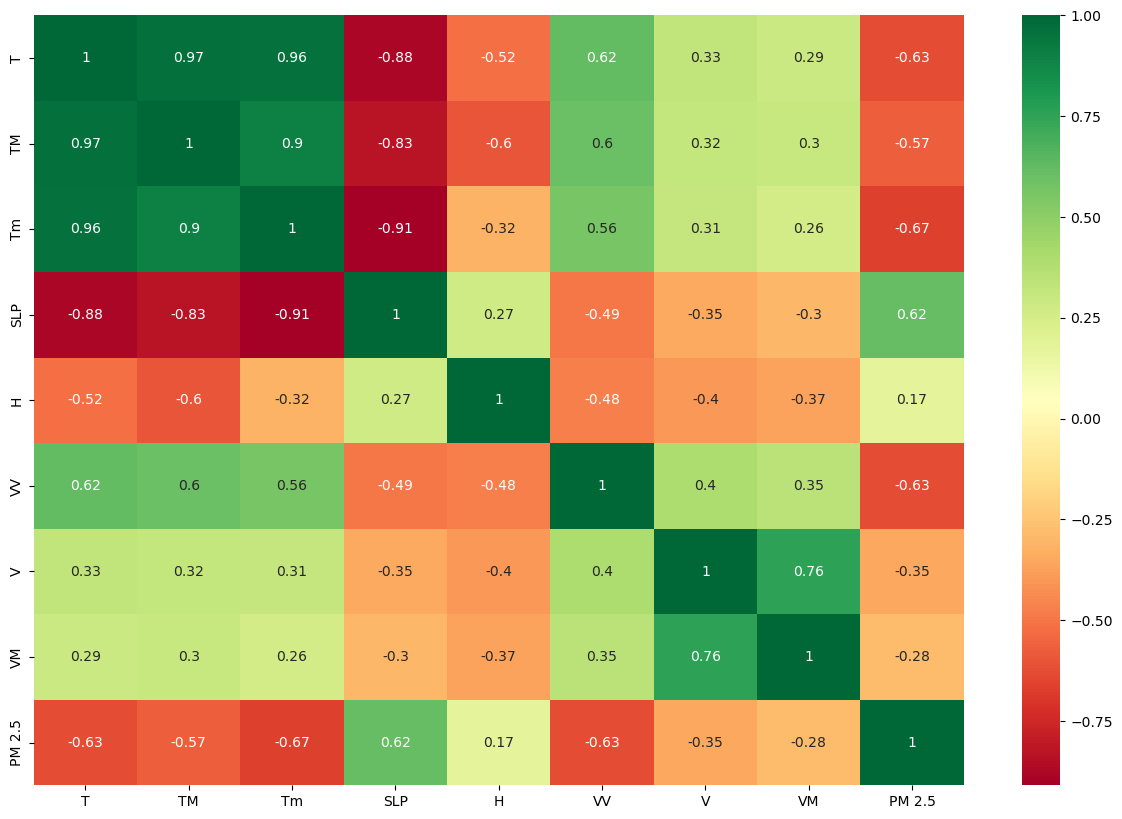

In [14]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [16]:
# Outlayer identification
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [17]:
print(model.feature_importances_)

[0.13449829 0.08753118 0.17525175 0.16315023 0.08472449 0.26356755
 0.05206324 0.03921328]


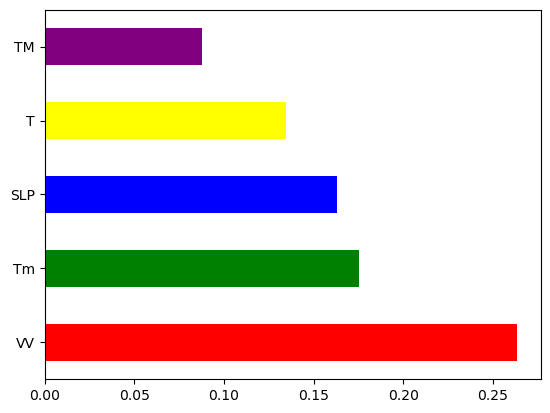

In [18]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
colors = ['red', 'green', 'blue', 'yellow', 'purple']
feat_importances.nlargest(5).plot(kind='barh', color=colors)
plt.show()

C:\Users\hudza\AppData\Local\Temp\ipykernel_17788\4041836890.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='PM 2.5', ylabel='Density'>

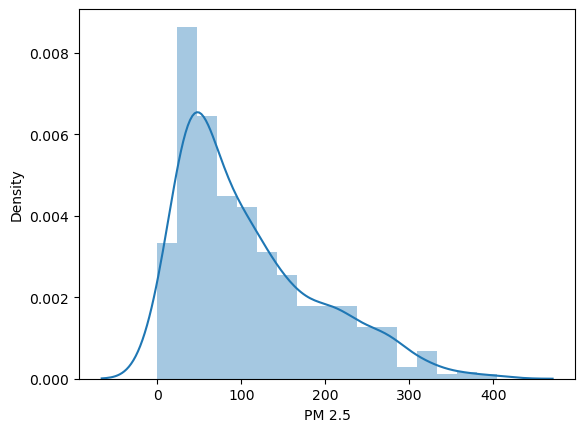

In [19]:
# Distribution y plot
sns.distplot(y) 

## Train Test Split

In [48]:
# import library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
# Import library Linear Regression
import xgboost as xgb
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
print("Coefsicient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefsicient of determination R^2 <-- on train set: 0.9998354086561624


In [51]:
print("Coefsicient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefsicient of determination R^2 <-- on train set: 0.627163059894531


In [52]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X, y, cv=5)

In [53]:
score.mean()

0.4608540457492545

## Model Evaluation

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an *decrease of 2.690 in AQI PM2.5 *.
- Holding all other features fixed, a 1 unit increase in TM is associated with an *increase of 0.46 in AQI PM 2.5 *.

In [54]:
prediction = regressor.predict(X_test)

C:\Users\hudza\AppData\Local\Temp\ipykernel_17788\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='PM 2.5', ylabel='Density'>

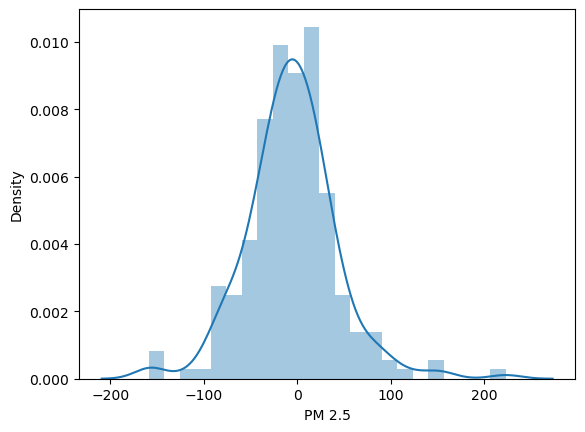

In [55]:
sns.distplot(y_test-prediction)

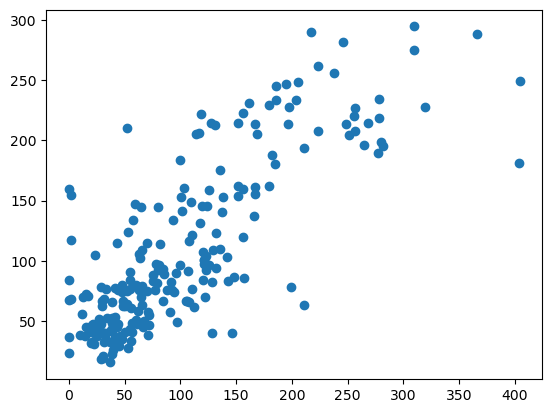

In [56]:
plt.scatter(y_test, prediction)

## Hyperparameter Tuning

In [57]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [60]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# max_depth.append(None)
#Subssample parameter values
subsample = [0.6, 0.7, 0.8]

# Minimum child weight parameters
min_child_weight = [3, 4, 5, 6, 7]

In [62]:
random_grid = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'subsample': subsample,
    'min_child_weight': min_child_weight
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.6, 0.7, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [63]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor = xgb.XGBRFRegressor()

In [64]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [65]:
xg_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   0.2s
[CV] END learning_ra

RandomizedSearchCV(cv=5,
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_bin=None,
                                            max_cat_threshold=Non...
                                            random_state=None, reg_alpha=None, ...),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.6, 0.7, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 400,
 'min_child_weight': 3,
 'max_depth': 20,
 'learning_rate': '0.6'}

In [67]:
xg_random.best_score_

-3266.4032450704517

In [68]:
predictions = xg_random.predict(X_test)

C:\Users\hudza\AppData\Local\Temp\ipykernel_17788\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='PM 2.5', ylabel='Density'>

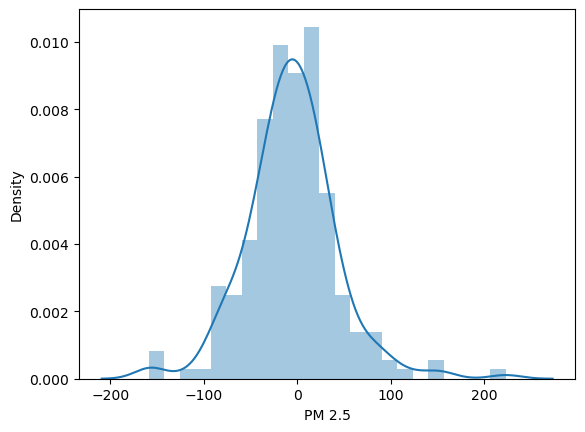

In [69]:
sns.distplot(y_test-prediction)

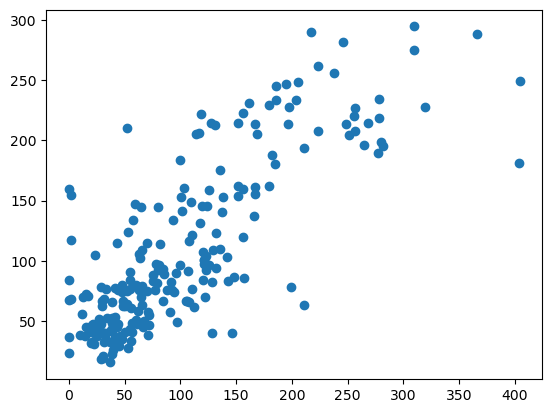

In [70]:
plt.scatter(y_test, prediction)


# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [71]:
from sklearn import metrics

In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 35.925438029726166
MSE: 2433.936901771027
RMSE: 49.33494605014813


## Deployment into Apps

In [73]:
import pickle

# open a file, where you ant to store the data
file = open('xgboost_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)